## Practica 7

#### Lozano Trejo Uriel 
##### Aprendizaje maquina e inteligencia artificial   
##### 5AM1

In [1]:
## Practica 7

#### Lozano Trejo Uriel 
##### Aprendizaje maquina e inteligencia artificial   
##### 5AM1

import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay 
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# SVM
class SVM:
    c_negative = list()
    c_positive = list()
    c = list()
    c_norma = 0
        
    def fit(self, X_train, y_train):
        positives = list()
        negatives = list()
        for i in range(len(y_train)):
            if y_train[i] == 1:
                positives.append(X_train[i])
            else:
                negatives.append(X_train[i])
        positives = np.array(positives)
        negatives = np.array(negatives)

        #vector c + y vector c -
        self.c_positive = np.mean(positives, 0)
        self.c_negative = np.mean(negatives, 0)
        self.c_positive = np.array(self.c_positive)
        self.c_negative = np.array(self.c_negative)

        #vector c y la norma del vector
        self.c = np.array(self.c_positive + self.c_negative) / 2
        self.c_norma = np.linalg.norm(self.c)
    
    # Modelo de preccion
    def predict(self, X_test):
        y_predict = list()
        for x in X_test:
            proyection = np.dot(x, self.c) / self.c_norma
            if proyection > self.c_norma:
                y_predict.append(1)
            else:
                y_predict.append(0)
        return y_predict

In [3]:
df = pd.read_csv('heart.csv', sep = ',', engine = 'python')

x = df.drop(['target'], axis = 1).values
y = df['target'].values

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [4]:
svm = SVM()
svm.fit(x_train, y_train)

In [5]:
#Salida C, C+, C- y ||C||

print('\nVector C+:') 
print(svm.c_positive)

print("\nVector C-:")
print(svm.c_negative)

print("\nVector C: ")
print(svm.c)

print("\nNorma del vector C:")
print(svm.c_norma)



Vector C+:
[5.32542373e+01 5.00000000e-01 1.36440678e+00 1.28991525e+02
 2.45398305e+02 1.27118644e-01 5.67796610e-01 1.58203390e+02
 1.52542373e-01 5.94915254e-01 1.60169492e+00 3.13559322e-01
 2.10169492e+00]

Vector C-:
[5.61063830e+01 8.29787234e-01 4.68085106e-01 1.34468085e+02
 2.50989362e+02 2.02127660e-01 5.21276596e-01 1.39085106e+02
 5.85106383e-01 1.70638298e+00 1.18085106e+00 1.19148936e+00
 2.48936170e+00]

Vector C: 
[5.46803101e+01 6.64893617e-01 9.16245943e-01 1.31729805e+02
 2.48193833e+02 1.64623152e-01 5.44536603e-01 1.48644248e+02
 3.68824378e-01 1.15064912e+00 1.39127299e+00 7.52524342e-01
 2.29552831e+00]

Norma del vector C:
322.565971485979


In [9]:
y_predict = svm.predict(x_test)
results_test = np.empty(len(y_test))
results_predict = np.empty(len(y_test))

for i in range(len(y_test)):
    results_test[i]= y_test[i]
    results_predict[i] = y_predict[i]

print("\nReporte de clasificación\n")
print(f'{"Y Test":10} {"Y Predict":1}')

for i in range(len(y_test)):
    print('{0:4} {1:10}'.format(round(results_test[i]), round(results_predict[i])))


Reporte de clasificación

Y Test     Y Predict
   0          0
   1          1
   0          1
   0          1
   1          0
   0          1
   0          0
   0          1
   0          1
   0          1
   1          0
   1          1
   0          0
   1          1
   1          0
   1          0
   1          0
   1          1
   0          0
   1          1
   1          0
   0          0
   0          1
   0          0
   1          0
   0          0
   0          0
   0          0
   1          0
   1          0
   0          0
   0          1
   1          1
   1          0
   1          0
   0          1
   0          1
   1          1
   0          0
   0          1
   1          0
   1          1
   1          0
   0          0
   1          0
   1          1
   1          0
   0          0
   0          1
   1          1
   1          1
   1          1
   1          1
   1          0
   1          0
   0          0
   1          0
   0          1
   1          0
   1    

In [7]:
target_names = list(map(str, [1, 0]))
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

           1       0.47      0.57      0.52        44
           0       0.50      0.40      0.45        47

    accuracy                           0.48        91
   macro avg       0.49      0.49      0.48        91
weighted avg       0.49      0.48      0.48        91



Gráfica de la matriz de confusión
[[19 28]
 [19 25]]


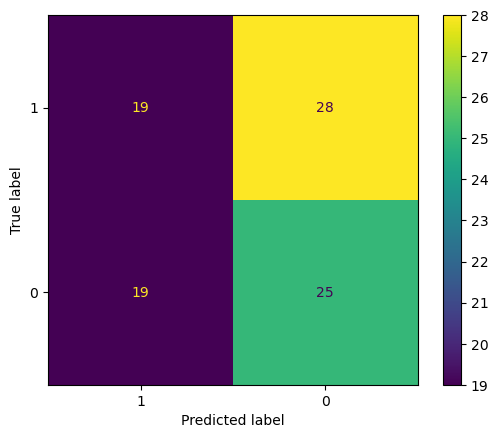

In [8]:
print('Gráfica de la matriz de confusión')

cm = confusion_matrix(y_test, y_predict, labels=[1, 0])
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()